### 1.

a) and b)

[1] -20

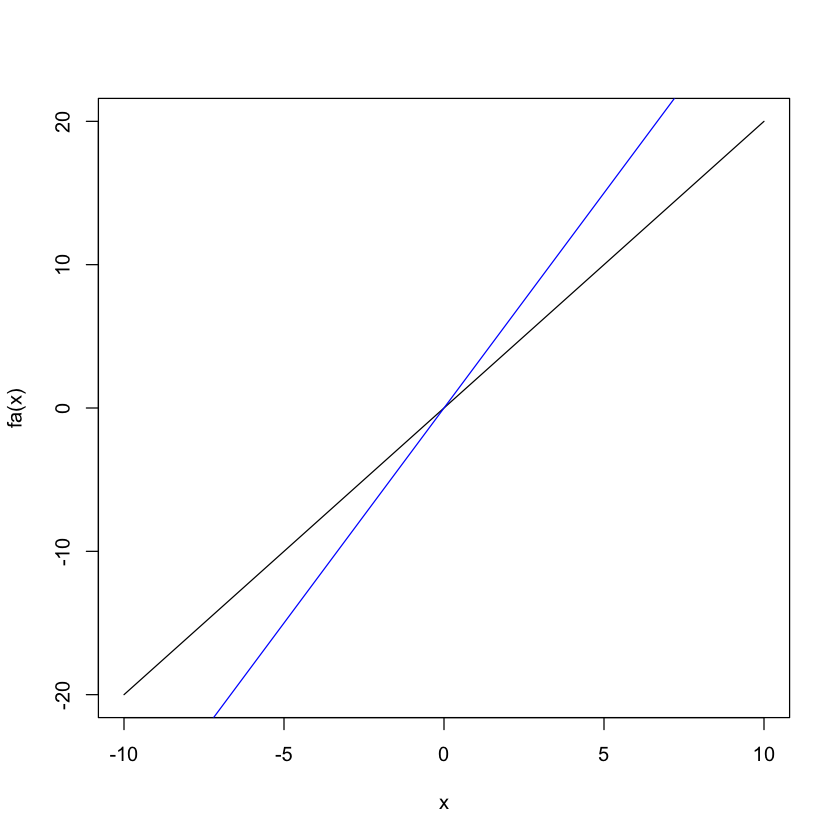

In [23]:
x = -10:10
fa = function(x) { 1 + (3*x) - (x + 1)}
fb = function(x) { -2 + x + 2 * (x + 1)}
plot(x, fa(x), type='l')
points(x, fb(x), type='l', col='blue')

### 4.

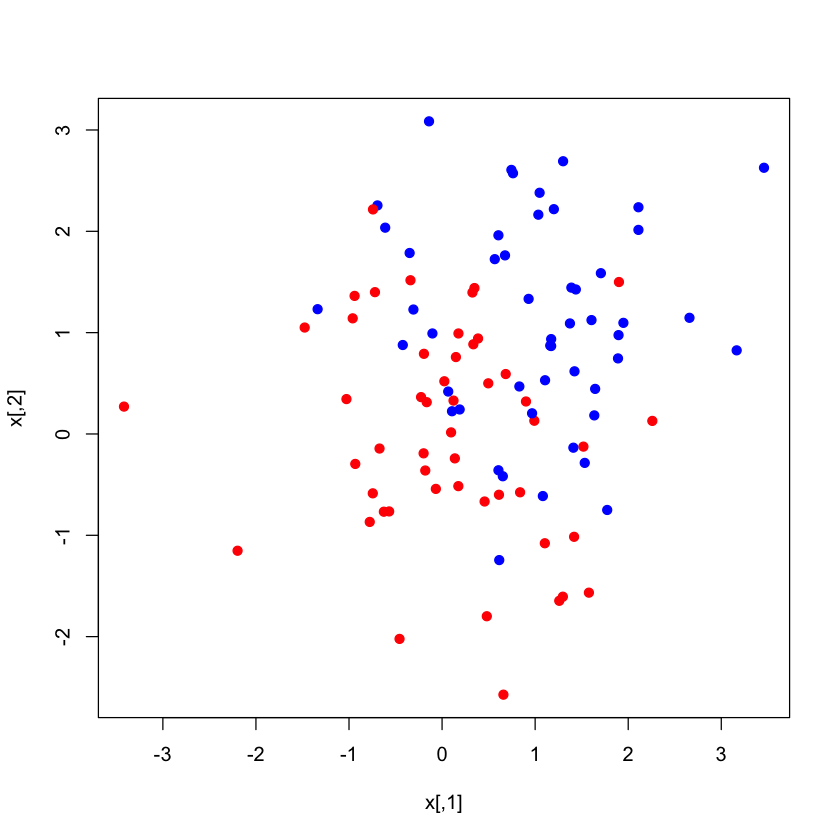

In [30]:
# install.packages('e1071')

x = matrix(rnorm(200),100,2)
y = rep(c(-1,1), c(10,10))
x[y==1,] = x[y==1,]+1
plot(x,col = y + 3,pch=19)

library(e1071)
dat = data.frame(x, y = as_factor(y))